### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(42)

In [0]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'1.12.0'

### Collect Data

In [4]:
import keras

Using TensorFlow backend.


In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [6]:
print(testY[0:5])

[9 2 1 1 6]


In [7]:
trainX.shape

(60000, 28, 28)

In [8]:
trainY.shape

(60000,)

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [9]:
print(trainY.shape)
print('First 2 examples are: ', trainY[0:2])

(60000,)
('First 2 examples are: ', array([9, 0], dtype=uint8))


In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [11]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

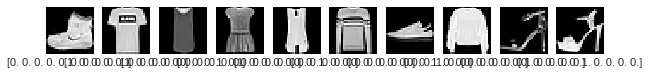

In [12]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary_r)
    plt.xlabel(trainY[i])

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
from tensorflow import keras
sgdo = tf.keras.optimizers.SGD(lr=.03)

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer=sgdo, loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Execute the model using model.fit()

In [17]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 85us/step - loss: 14.4665 - acc: 0.1024 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/10
60000/60000 [==============================] - 4s 74us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/10
60000/60000 [==============================] - 4s 74us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/10
60000/60000 [==============================] - 4s 73us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/10
60000/60000 [==============================] - 4s 72us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/10
60000/60000 [==============================] - 4s 73us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/10
60000/60000 [==============================] - 4s 72us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

In [18]:
model.evaluate(testX,testY)

10000/10000 [==============================] - 0s 23us/step


[14.506285681152344, 0.1]

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [20]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 57us/step - loss: 0.6003 - acc: 0.7936 - val_loss: 0.5206 - val_acc: 0.8225
Epoch 2/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.4903 - acc: 0.8315 - val_loss: 0.4977 - val_acc: 0.8294
Epoch 3/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.4694 - acc: 0.8390 - val_loss: 0.4856 - val_acc: 0.8358
Epoch 4/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.4564 - acc: 0.8428 - val_loss: 0.4777 - val_acc: 0.8354
Epoch 5/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.4480 - acc: 0.8465 - val_loss: 0.4669 - val_acc: 0.8388
Epoch 6/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.4429 - acc: 0.8469 - val_loss: 0.4728 - val_acc: 0.8363
Epoch 7/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.4378 - acc: 0.8483 - val_loss: 0.4711 - val_acc

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=sgd_optimizer, loss='mse')

In [22]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.0210 - val_loss: 0.0227
Epoch 2/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0211 - val_loss: 0.0227
Epoch 3/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0210 - val_loss: 0.0226
Epoch 4/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0208 - val_loss: 0.0225
Epoch 5/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0208 - val_loss: 0.0225
Epoch 6/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0208 - val_loss: 0.0226
Epoch 7/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0208 - val_loss: 0.0226
Epoch 8/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0209 - val_loss: 0.0225
Epoch 9/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0208 - val_loss: 0.0225
Epoch

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

In [0]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

In [0]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(10, activation='relu'))

## Review model

In [0]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [29]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=30,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 97us/step - loss: 2.6412 - acc: 0.4827 - val_loss: 2.6691 - val_acc: 0.3759
Epoch 2/30
60000/60000 [==============================] - 6s 92us/step - loss: 2.3454 - acc: 0.6522 - val_loss: 2.2401 - val_acc: 0.7186
Epoch 3/30
60000/60000 [==============================] - 6s 92us/step - loss: 2.5569 - acc: 0.5447 - val_loss: 2.3434 - val_acc: 0.6214
Epoch 4/30
60000/60000 [==============================] - 5s 91us/step - loss: 4.0585 - acc: 0.3380 - val_loss: 4.0913 - val_acc: 0.3890
Epoch 5/30
60000/60000 [==============================] - 5s 91us/step - loss: 4.1238 - acc: 0.4306 - val_loss: 4.1146 - val_acc: 0.3866
Epoch 6/30
60000/60000 [==============================] - 5s 91us/step - loss: 4.1109 - acc: 0.3841 - val_loss: 4.0586 - val_acc: 0.4264
Epoch 7/30
60000/60000 [==============================] - 5s 91us/step - loss: 3.9978 - acc: 0.4661 - val_loss: 3.9216 - val_acc